In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### GOAL --> PREDICT FOOTBALL MATCH RESULT AND STUDY THE IMPACT OF THE DIFFERENT FEATURES ON THE RESULT. 

In [107]:
df = pd.read_csv('laliga_optimized.csv')
df.head()

,id,season,division,round,localTeam,visitorTeam,localGoals,visitorGoals,date,result,...,local_3streak,visitor_3streak,local_5streak,visitor_5streak,last_1ra_loc,last_1ra_vis,Rk_loc,Rk_vis,last_top6_loc,last_top6_vis
0,11702,1987-88,1,1,Atletico de Bilbao,Mallorca,2,1,1987-08-29,2,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0
1,11703,1987-88,1,1,Espanol,Celta de Vigo,0,1,1987-08-29,0,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0
2,11704,1987-88,1,1,Sporting de Gijon,Valladolid,0,0,1987-08-29,1,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0
3,11705,1987-88,1,1,Valencia,Logrones,2,0,1987-08-29,2,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0
4,11706,1987-88,1,1,Atletico de Madrid,Sabadell,1,0,1987-08-30,2,...,0.0,0.0,0.0,0.0,1,1,1.0,1.0,0,0


In [108]:
df.drop(['id','division','total_punts_loc','total_punts_vis','date'], axis=1, inplace=True)

In [110]:
df.describe()

,round,localGoals,visitorGoals,result,T1PliS,T1PviS,T2PliS,T2PviS,month,day_of_week,...,local_3streak,visitor_3streak,local_5streak,visitor_5streak,last_1ra_loc,last_1ra_vis,Rk_loc,Rk_vis,last_top6_loc,last_top6_vis
count,11020.000000,11020.000000,11020.000000,11020.000000,11020.000000,11020.000000,11020.000000,11020.000000,11020.000000,11020.000000,...,11020.000000,11020.000000,11020.000000,11020.000000,11020.000000,11020.000000,11020.000000,11020.000000,11020.000000,11020.000000
mean,19.500000,1.554537,1.065517,1.232759,0.535380,0.338534,0.549717,0.329627,6.041470,6.291198,...,3.645644,4.142196,6.093466,6.525318,0.860345,0.860345,7.486479,7.294828,0.287931,0.287931
std,10.966354,1.317961,1.095109,0.829069,0.251021,0.209923,0.236367,0.215476,2.729012,1.328465,...,2.374335,2.425553,3.383439,3.450425,0.346645,0.346645,4.365431,4.337507,0.452819,0.452819
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,10.000000,1.000000,0.000000,0.000000,0.392157,0.205128,0.410256,0.190476,4.000000,6.000000,...,2.000000,3.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,0.000000,0.000000
50%,19.500000,1.000000,1.000000,1.000000,0.546537,0.333333,0.555556,0.312500,6.000000,7.000000,...,4.000000,4.000000,6.000000,7.000000,1.000000,1.000000,7.000000,7.000000,0.000000,0.000000
75%,29.000000,2.000000,2.000000,2.000000,0.692308,0.444444,0.700000,0.444444,8.000000,7.000000,...,6.000000,6.000000,8.000000,9.000000,1.000000,1.000000,11.000000,11.000000,1.000000,1.000000
max,38.000000,10.000000,8.000000,2.000000,1.000000,1.000000,1.000000,1.000000,11.000000,7.000000,...,9.000000,9.000000,15.000000,15.000000,1.000000,1.000000,20.000000,20.000000,1.000000,1.000000


#### FEATURE SELECTION, STANDARIZATION AND ENCODING

In [112]:
y = df['result']
X = df.drop(['result'], axis=1)

#### FEATURE SELECTION:

In [113]:

M_goals = df[['localGoals', 'visitorGoals']]
X.drop(['localGoals', 'visitorGoals'], axis=1, inplace=True)


#### ENCODING: (only train set)

In [114]:
X.dtypes 

season              object
round                int64
localTeam           object
visitorTeam         object
T1PliS             float64
T1PviS             float64
T2PliS             float64
T2PviS             float64
month                int64
day_of_week          int64
GoalsliS           float64
GoalsviS           float64
local_3streak      float64
visitor_3streak    float64
local_5streak      float64
visitor_5streak    float64
last_1ra_loc         int64
last_1ra_vis         int64
Rk_loc             float64
Rk_vis             float64
last_top6_loc        int64
last_top6_vis        int64
dtype: object

In [115]:
XlocalTeam = X['localTeam']
XvisitorTeam = X['visitorTeam']
X.drop(['localTeam','visitorTeam'], axis = 1, inplace = True) #No needed anymore

We stratify the data in order to have the same proportion of wins, draws and losses in the train and test set.

In [116]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=33)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33, stratify=y)

In [117]:
X_train.dtypes

season              object
round                int64
T1PliS             float64
T1PviS             float64
T2PliS             float64
T2PviS             float64
month                int64
day_of_week          int64
GoalsliS           float64
GoalsviS           float64
local_3streak      float64
visitor_3streak    float64
local_5streak      float64
visitor_5streak    float64
last_1ra_loc         int64
last_1ra_vis         int64
Rk_loc             float64
Rk_vis             float64
last_top6_loc        int64
last_top6_vis        int64
dtype: object

In [118]:
#Example: 2017-2018 -> 2017
X_train['season'] = X_train['season'].apply(lambda x: int(x[:4]))
from sklearn.preprocessing import OrdinalEncoder
#Ordinality: 'season', 'round', 'month', 'day_of_week'

ord_enc_season = OrdinalEncoder()
ord_enc_round = OrdinalEncoder()
ord_enc_month = OrdinalEncoder()
ord_enc_day_of_week = OrdinalEncoder()
#apply ordinal encoder to each column:

X_train['season'] = ord_enc_season.fit(X_train['season'].values.reshape(-1, 1)).transform(X_train['season'].values.reshape(-1, 1))
X_train['round'] = ord_enc_round.fit(X_train['round'].values.reshape(-1, 1)).transform(X_train['round'].values.reshape(-1, 1))
X_train['month'] = ord_enc_month.fit(X_train['month'].values.reshape(-1, 1)).transform(X_train['month'].values.reshape(-1, 1))
X_train['day_of_week'] = ord_enc_day_of_week.fit(X_train['day_of_week'].values.reshape(-1, 1)).transform(X_train['day_of_week'].values.reshape(-1, 1))
keys_normalizer = X_train.keys()


#### NORMALIZE :

In [1]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit and transform separately
X_train = scaler.fit(X_train).transform(X_train)
X_train = pd.DataFrame(X_train, columns=keys_normalizer)

NameError: name 'X_train' is not defined

Ara ja podem observar la matriu de correlació:

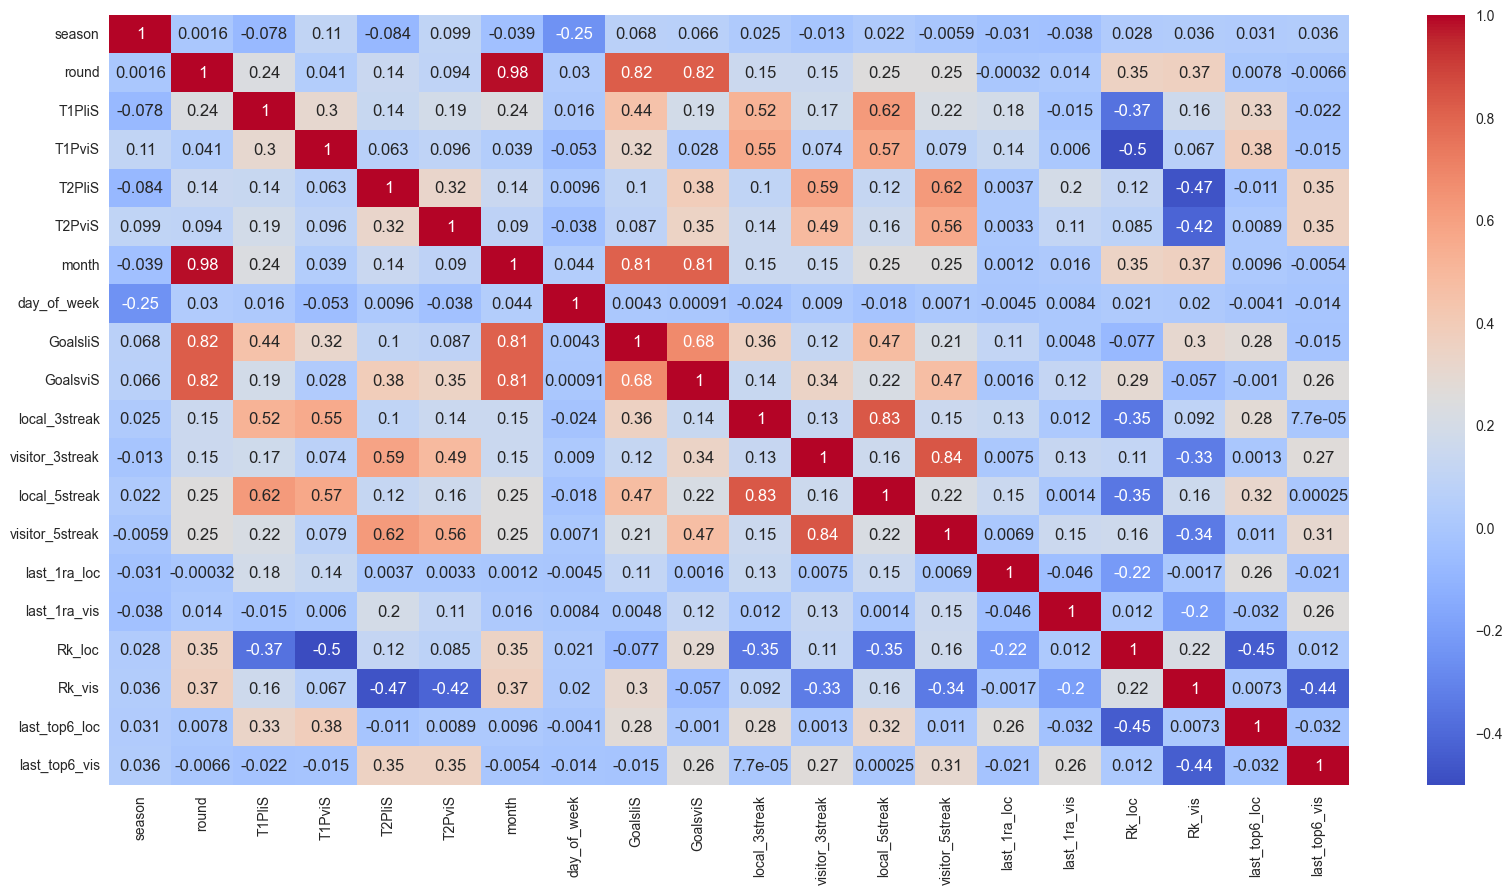

In [121]:
#correalation matrix
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.show()


In [122]:
X_train.head()

,season,round,T1PliS,T1PviS,T2PliS,T2PviS,month,day_of_week,GoalsliS,GoalsviS,local_3streak,visitor_3streak,local_5streak,visitor_5streak,last_1ra_loc,last_1ra_vis,Rk_loc,Rk_vis,last_top6_loc,last_top6_vis
0,-0.236995,0.497958,-0.253476,-0.157586,0.055827,0.854575,0.346769,0.53195,0.170022,-0.005396,-0.699373,-0.473368,-0.618395,0.725921,0.399796,0.402033,0.350935,-0.990155,-0.641572,-0.639881
1,-1.314686,-0.683465,1.845312,0.236637,1.431045,1.555038,-0.748396,-0.21883,-0.455282,-0.062870,-0.279292,-0.058217,0.849702,0.434091,0.399796,0.402033,-1.250526,-1.452559,1.558673,1.562791
2,-0.476482,-1.410494,1.845312,1.550715,1.901514,0.014020,-1.478505,-0.21883,-0.910048,-1.039928,1.401033,1.187239,0.262463,0.142261,0.399796,0.402033,-1.250526,-1.221357,1.558673,1.562791
3,0.840696,-0.138193,-1.137176,0.149032,0.490107,-0.178607,-0.018286,-0.21883,-0.114207,0.109552,-0.279292,0.772087,-0.031156,0.725921,0.399796,0.402033,1.723616,0.165856,-0.641572,-0.639881
4,0.481466,-0.410829,0.898490,1.100174,-0.719672,-0.866561,-0.383341,0.53195,0.113176,-0.637610,0.140789,-0.473368,1.143322,-1.025061,0.399796,0.402033,-1.250526,1.321866,1.558673,-0.639881


## MODELING:

### LOGISTIC REGRESSION:

              precision    recall  f1-score   support

           0       0.46      0.32      0.38      2102
           1       0.38      0.01      0.02      2137
           2       0.53      0.89      0.67      4026

    accuracy                           0.52      8265
   macro avg       0.46      0.41      0.36      8265
weighted avg       0.48      0.52      0.43      8265



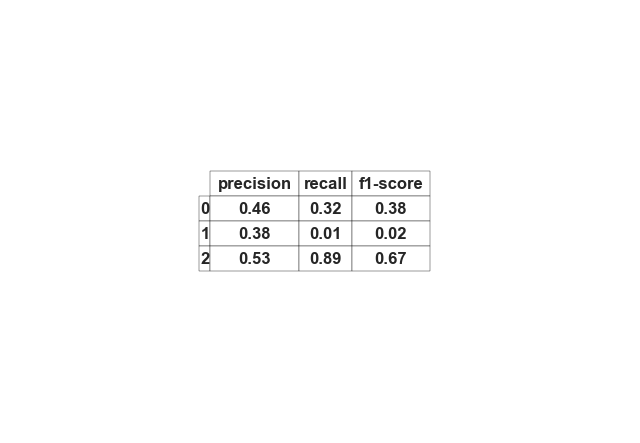

In [123]:
#simple logistic regression, let's see the confusion matrix and the classification report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
log_reg = LogisticRegression()
#OvR by default
log_reg.fit(X_train, y_train)
y_train_pred = log_reg.predict(X_train)
conf_log_reg_train = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))


El programa tendeix a considerar més victòries de les que realment hi ha. Veiem que la recall de victòria(2) és molt alta (0.89), per tant hi ha pocs false negatives en la victòria (pocs cops diu que no és victòria quan sí que n'és). Veiem que la precisió de la victòria és més baixa (0.54) ja que tendim a assignar moltes victòries que realment no ho són. 

En el cas de draw (1), la recall és súper baixa (0.02) ja que hi ha molts empats que es consideren con a victòria/derrota. La precisió és una mica major (0.35), però al ser baixa ens indica que el model prediu bastants empats que no ho són.

En el cas de derrota(0), la recall és de 0.36, vol dir que hi ha moltes derrotes que es consideren victòries/empats. La precisió és de 0.47, per tant el model prediu casi la meitat de derrotes que no ho són.

In [124]:
#Exact accuracy:
print("Basic Logistic Regression Train Accuracy: ", log_reg.score(X_train, y_train))

Basic Logistic Regression Train Accuracy:  0.5186932849364791


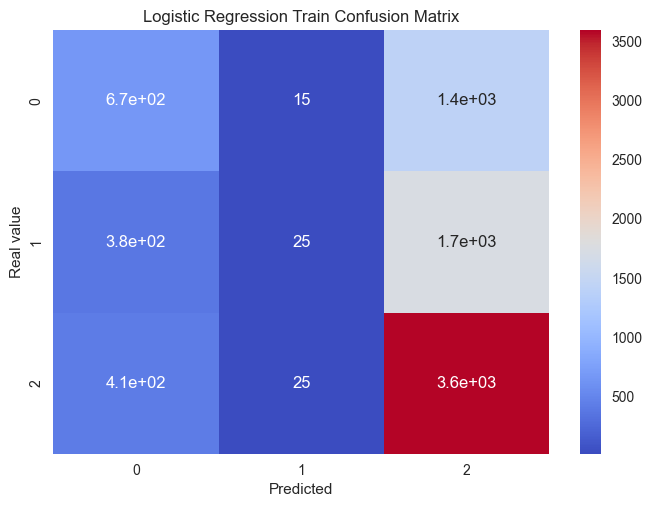

In [125]:
sns.heatmap(conf_log_reg_train, annot=True, cmap='coolwarm')
plt.title('Logistic Regression Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real value')
plt.show()

### We use accuracy as a metric to compare the models. We want to maximize the number of correct predictions.

c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


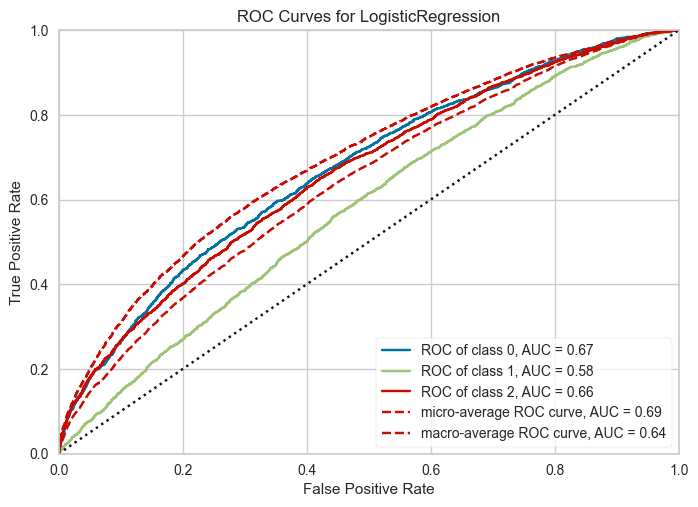

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [126]:
#ROC curve train
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(log_reg, classes=[0, 1, 2])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_train, y_train)        # Evaluate the model on the test data
visualizer.show()   

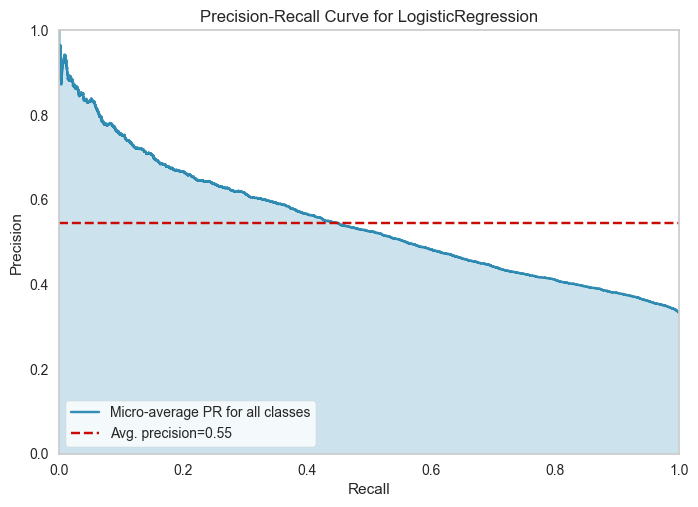

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [127]:
from yellowbrick.classifier import PrecisionRecallCurve


visualizer = PrecisionRecallCurve(log_reg, classes=[0, 1, 2])
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.show()

GRIDSEARCH:

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from tqdm import tqdm

models = {
    #'Logistic Regression': (LogisticRegression(), {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]}),
    #'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [3, 4, 5, 6, 7, 9], 'min_samples_split': [2, 3, 4, 5, 6]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [7, 8, 9, 10], 'min_samples_split': [3, 4, 5, 6]}),
    #'SVC': (SVC(), {'kernel': ['linear', 'rbf', 'sigmoid'], 'C': [1, 10, 50, 100, 150]}), #triga massa (>45min)
    #'KNN': (KNeighborsClassifier(), {'n_neighbors': [11, 13, 15, 17, 19], 'weights': ['uniform', 'distance']}),
    #'XGBoost': (XGBClassifier(), {'n_estimators': [5, 10, 20, 50, 100], 'max_depth': [1, 2, 3, 4], 'learning_rate': [0.01, 0.05, 0.1, 0.2]}),
    #'Bagging': (BaggingClassifier(), {'n_estimators': [300, 400, 500], 'max_samples': [0.1, 0.5, 1.0], 'max_features': [0.1, 0.5, 1.0]}),
    #'OvR Logistic Regression': (LogisticRegression(multi_class='ovr'), {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10]}),
    #'OvO Logistic Regression': (LogisticRegression(multi_class='multinomial', solver='newton-cg'), {'penalty': ['l2'], 'C': [0.001, 0.01, 0.05, 0.1, 1]})
}
    
for name, (model, params) in tqdm(models.items()):
    print('Model: ', name)
    grid = GridSearchCV(model, params, cv=skf, scoring='accuracy', n_jobs=-1) #usem n_jobs per a paralelitzar el màxima possible
    grid.fit(X_train, y_train)
    print('Best score: ', grid.best_score_)
    print('Best params: ', grid.best_params_)
    print('-----------------------------------------------------')
    
    

  0%|          | 0/1 [00:00<?, ?it/s]

Model:  Random Forest


100%|██████████| 1/1 [02:03<00:00, 123.43s/it]

Best score:  0.5201451905626134
Best params:  {'max_depth': 7, 'min_samples_split': 6, 'n_estimators': 200}
-----------------------------------------------------


In [150]:
best_models = {
    'Basic Logistic Regression': LogisticRegression(),
    #'Logistic Regression': (LogisticRegression(), {'penalty': [], 'C': []}),
    #'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [], 'min_samples_split': []}),
    'Random Forest': RandomForestClassifier(n_estimators= 400, max_depth= 8, min_samples_split= 10),
    #'SVC': (SVC(), {'kernel': [], 'C': []}),
    #'KNN': (KNeighborsClassifier(), {'n_neighbors': [], 'weights': []}),
    'XGBoost': XGBClassifier(n_estimators = 50, max_depth = 3, learning_rate = 0.2),
    #'Bagging': (BaggingClassifier(), {'n_estimators': [], 'max_samples': [], 'max_features': []}),
    'OvR Logistic Regression': LogisticRegression(multi_class='ovr', penalty = 'l2', C = 0.01),
    'OvO Logistic Regression': LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty = 'l2', C = 0.01)
}


X_test preparation:

In [132]:
X_test_original = X_test.copy()

X_test['season'] = X_test['season'].apply(lambda x: int(x[:4]))

X_test['season'] = ord_enc_season.transform(X_test['season'].values.reshape(-1, 1))
X_test['round'] = ord_enc_round.transform(X_test['round'].values.reshape(-1, 1))
X_test['month'] = ord_enc_month.transform(X_test['month'].values.reshape(-1, 1))
X_test['day_of_week'] = ord_enc_day_of_week.transform(X_test['day_of_week'].values.reshape(-1, 1))

keys_normalizer = X_test.keys()


In [133]:
#transform:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=keys_normalizer)

In [152]:
# Train the model with the best hyperparameters
for name, model in best_models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

#make predictions
models_acc = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    models_acc[name] = report['accuracy']

models_f1 = pd.DataFrame.from_dict(models_acc, orient='index', columns=['accuracy'])
models_f1.sort_values(by='accuracy', ascending=False, inplace=True)
models_f1
    

Training Basic Logistic Regression...
Training Random Forest...
Training XGBoost...
Training OvR Logistic Regression...
Training OvO Logistic Regression...


c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\genis\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

,accuracy
Random Forest,0.512523
Basic Logistic Regression,0.511071
OvO Logistic Regression,0.508530
XGBoost,0.508167
OvR Logistic Regression,0.507441


In [153]:
# feature importances dictionary:
feature_importances_dic = {}
for name, model in best_models.items():
    if name not in ['Basic Logistic Regression', 'OvO Logistic Regression', 'OvR Logistic Regression']:
        feat_imp_aux = model.feature_importances_
        feature_importances_dic[name] = feat_imp_aux
        
df_feature_importances = pd.DataFrame(feature_importances_dic, index = X_test.columns)

df_feature_importances
        

,Random Forest
T1PviS,0.084651
T2PliS,0.078497
T1PliS,0.074156
last_top6_vis,0.071806
GoalsviS,0.069465
last_top6_loc,0.068079
Rk_vis,0.065693
season,0.064363
T2PviS,0.062894
GoalsliS,0.062690


In [104]:
#pick the best model:
model_rf = best_models['Random Forest']
y_pred_rf = model_rf.predict(X_test)

df_test_errors_rf = X_test_original.copy()

#add localTeam and visitorTeam
df_test_errors_rf['localTeam'] = XlocalTeam
df_test_errors_rf['visitorTeam'] = XvisitorTeam

#add predicted and real value
df_test_errors_rf['predicted'] = y_pred_rf
df_test_errors_rf['real_value'] = y_test.values


#Save the dataframe:
#df_test_errors_rf.to_csv('df_test_rf.csv', index=False)

# errors dataframe:
df_test_errors_rf = df_test_errors_rf[df_test_errors_rf['predicted'] != df_test_errors_rf['real_value']]
df_test_errors_rf.head()

,season,round,T1PliS,T1PviS,T2PliS,T2PviS,month,day_of_week,GoalsliS,GoalsviS,...,last_1ra_loc,last_1ra_vis,Rk_loc,Rk_vis,last_top6_loc,last_top6_vis,localTeam,visitorTeam,predicted,real_value
9872,2014-15,38,0.888889,0.789474,0.368421,0.240741,10,6,108.0,33.0,...,1,0,1.0,15.0,1,0,Barcelona,Deportivo,2,1
3037,1994-95,38,0.888889,0.526316,0.614035,0.425926,11,7,76.0,44.0,...,1,0,1.0,5.0,1,0,Real Madrid,Betis,2,0
3945,1999-00,15,0.761905,0.238095,0.523810,0.095238,5,7,21.0,11.0,...,1,1,6.0,13.0,1,0,Mallorca,Oviedo,2,1
9898,2015-16,2,0.000000,0.000000,0.000000,0.000000,1,7,0.0,1.0,...,0,1,3.0,3.0,0,0,Las Palmas,Levante,2,1
4557,2000-01,38,0.444444,0.333333,0.456140,0.240741,11,7,52.0,42.0,...,1,0,11.0,14.0,0,0,Real Sociedad,Osasuna,2,0


In [105]:
#guardem el dataframe en un csv:
#df_test_errors_rf.to_csv('df_test_errors_rf.csv', index=False)


